<a href="https://colab.research.google.com/github/VismayaS25/StudentPerformance/blob/main/Student_Performance(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import warnings
df=pd.read_csv('/content/drive/MyDrive/project file download/Student_Performance.csv')
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [2]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [3]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [4]:
numeric_var = ['Hours Studied', 'Previous Scores', 'Sleep Hours',
               'Sample Question Papers Practiced', 'Performance Index']

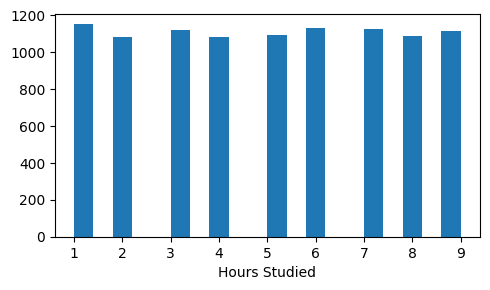

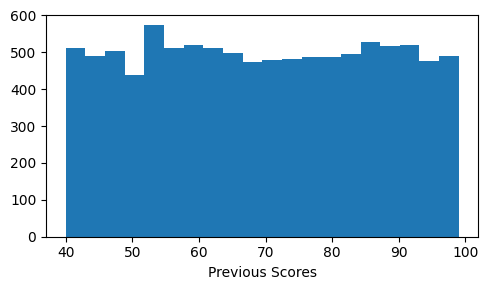

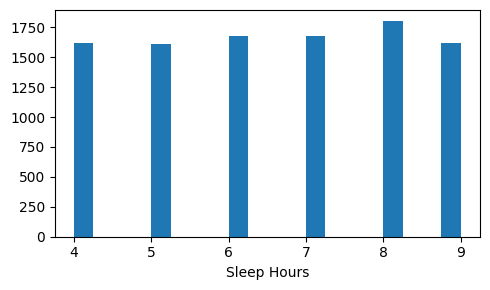

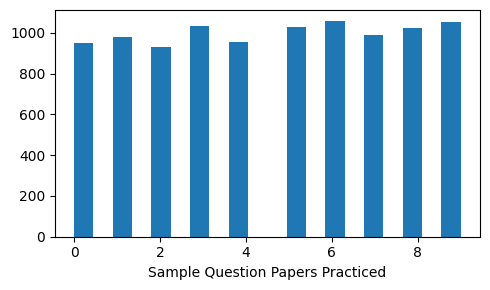

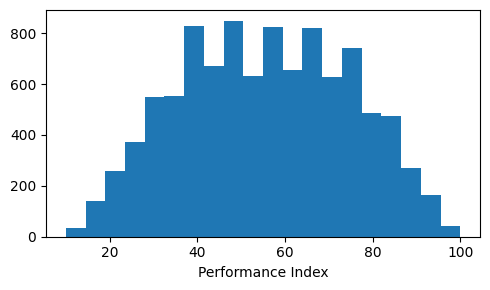

In [5]:
for i in numeric_var:
    plt.figure(figsize=(5,3))
    plt.hist(x=i,data=df[numeric_var],bins=20)
    plt.xlabel(i)
    plt.tight_layout()
    plt.show()

<Axes: xlabel='Extracurricular Activities', ylabel='count'>

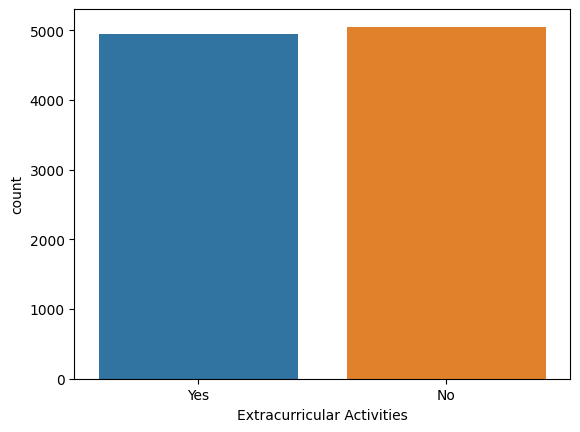

In [6]:
sns.countplot(x='Extracurricular Activities',data=df)

In [7]:
df.corr()

<ipython-input-7-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.005944,0.007888,0.915189
Sleep Hours,0.001245,0.005944,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.048106,0.043268,1.000000


<ipython-input-8-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

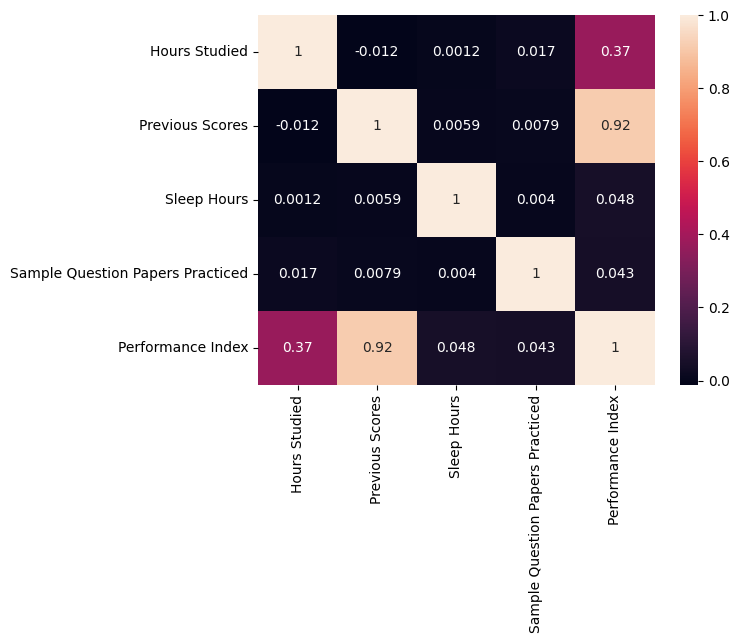

In [8]:
sns.heatmap(df.corr(),annot=True)

In [9]:
df.drop(['Extracurricular Activities'],axis=1,inplace=True)

In [10]:
X=df.iloc[:,:-1]
X

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
0,7,99,9,1
1,4,82,4,2
2,8,51,7,2
3,5,52,5,2
4,7,75,8,5
...,...,...,...,...
9995,1,49,4,2
9996,7,64,8,5
9997,6,83,8,5
9998,9,97,7,0


In [11]:
y=df.iloc[:,-1]
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [12]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
X

array([[0.75      , 1.        , 1.        , 0.11111111],
       [0.375     , 0.71186441, 0.        , 0.22222222],
       [0.875     , 0.18644068, 0.6       , 0.22222222],
       ...,
       [0.625     , 0.72881356, 0.8       , 0.55555556],
       [1.        , 0.96610169, 0.6       , 0.        ],
       [0.75      , 0.57627119, 0.8       , 0.11111111]])

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.3)

In [14]:
mlr=LinearRegression()
knn=KNeighborsRegressor()
svr=SVR()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()
models=[mlr,knn,svr,dtr,rfr]
for model in models:
  print('*****************',model,'*********************')
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print('r2_score:',r2_score(y_test,y_pred))
  print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))
  print('mean_squared_error:',mean_squared_error(y_test,y_pred))
  print('RMSE:',np.sqrt(y_test,y_pred))


***************** LinearRegression() *********************
r2_score: 0.9881228308633405
mean_absolute_error: 1.6433726240838427
mean_squared_error: 4.3177891167482985
RMSE: 9953    7.615773
3850    8.000000
4962    8.660254
3886    7.681146
5437    9.273618
          ...   
5273    7.141428
8014    5.656854
8984    9.327379
6498    8.246211
6327    6.855655
Name: Performance Index, Length: 3000, dtype: float64
***************** KNeighborsRegressor() *********************
r2_score: 0.97666180904154
mean_absolute_error: 2.3244000000000002
mean_squared_error: 8.484293333333332
RMSE: 9953    7.615773
3850    8.000000
4962    8.660254
3886    7.681146
5437    9.273618
          ...   
5273    7.141428
8014    5.656854
8984    9.327379
6498    8.246211
6327    6.855655
Name: Performance Index, Length: 3000, dtype: float64
***************** SVR() *********************
r2_score: 0.9844770545943178
mean_absolute_error: 1.855018911779501
mean_squared_error: 5.643163279173788
RMSE: 9953    7.6157

In [15]:
warnings.filterwarnings('ignore')
y_new=mlr.predict(scaler.transform([[7,99,9,1]]))
print('Performance:',y_new.item())

Performance: 91.54322614108543


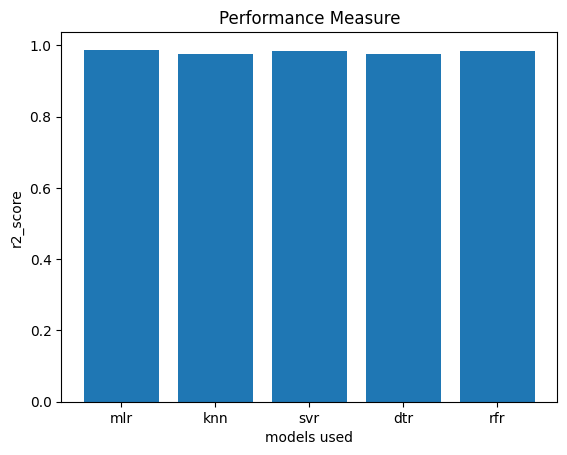

In [16]:
x=['mlr','knn','svr','dtr','rfr']
y=[0.9881228308633405,0.97666180904154,0.9844770545943178,0.9753758177375855,0.9842725325894311]
plt.bar(x,y)
plt.xlabel('models used')
plt.ylabel('r2_score')
plt.title('Performance Measure')
plt.show()